# Imports

In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

# How does brain activity change

# Monkey Resting ECoG Data
Recorded from monkey whole cortex. ECoG sampled at 1000Hz, 3 channels. From **Yanagawa et al., PLOS ONE, 2013.**

In this experiment, the monkey is sitting in a chair with no task demands. 5 minutes of data each are provided during 3 different stages: awake eyes open, awake eyes closed, and anesthesized. They are stored in `ecog_eyesopen`,`ecog_eyesclosed`, and `ecog_anes` respectively. The sampling rate is provided, from which you can compute the time vectors (they can have their own time vectors all starting from 0s).

`labels` contains information about which brain regions the 3 channels are located in, while `elec_num` has the electrode number, which you can find on the brain map image included in the same folder (brainmap.jpg).

In [2]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
print(monkey_ecog_data.keys())
print('FS:', monkey_ecog_data['fs'])
print(monkey_ecog_data['ecog_eyesopen'].shape)
print(monkey_ecog_data['labels'])
print(monkey_ecog_data['elec_num'])

fs = monkey_ecog_data['fs']

dict_keys(['__header__', '__version__', '__globals__', 'ecog_anes', 'ecog_eyesclosed', 'ecog_eyesopen', 'elec_num', 'fs', 'labels'])
FS: 1000
(3, 300000)
['cingulate' 'occipital' 'temporal']
[52 70 91]


# Monkey: Awake Eyes Open

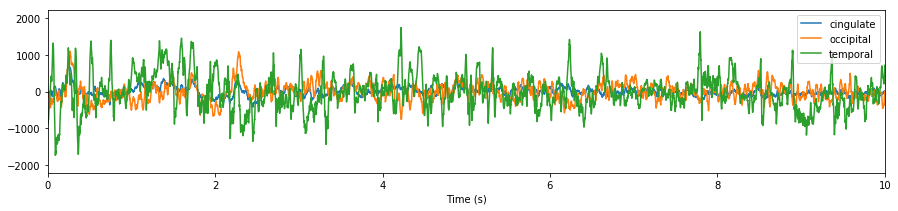

In [31]:
T_eyesopen = np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs'])

plt.figure(figsize=(15,3))
plt.plot(T_eyesopen, monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

# Monkey: Awake Eyes Closed

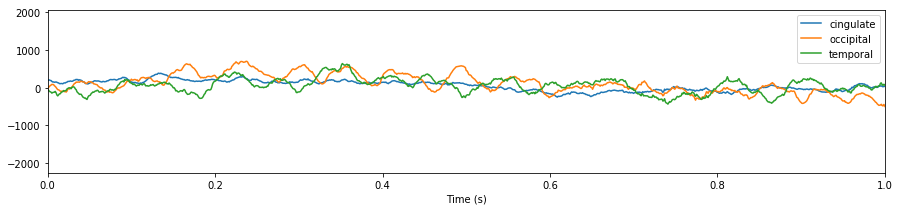

In [4]:
T_eyesclosed = np.arange(0,monkey_ecog_data['ecog_eyesclosed'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs'])

plt.figure(figsize=(15,3))
plt.plot(T_eyesclosed, monkey_ecog_data['ecog_eyesclosed'].T)
plt.xlim([0,1])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

# Monkey: Anesthesized

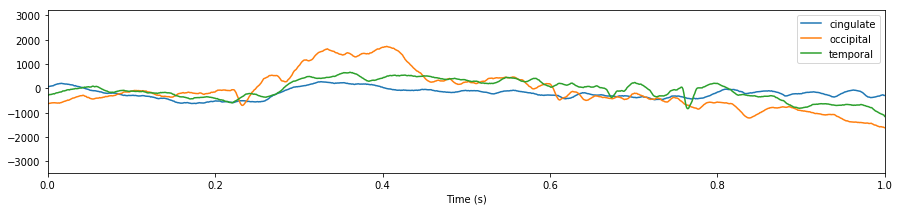

In [5]:
T_anes = np.arange(0,monkey_ecog_data['ecog_anes'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs'])

plt.figure(figsize=(15,3))
plt.plot(T_anes, monkey_ecog_data['ecog_anes'].T)
plt.xlim([0,1])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

In [30]:
data_open = monkey_ecog_data['ecog_eyesopen'][1]
print(data_open)

[-117 -118 -100 ... -132 -143 -143]


(-100, 100)

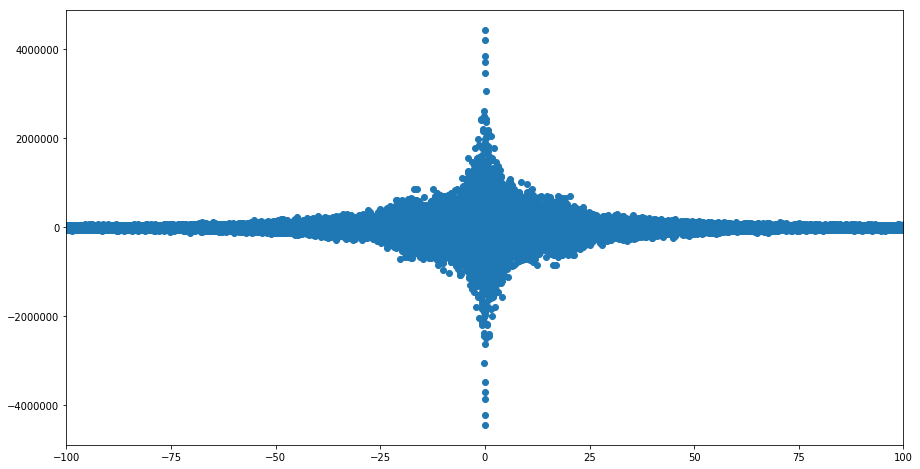

In [35]:
data_open_occipital = monkey_ecog_data['ecog_eyesopen'][1]

freqs = np.fft.fftfreq(len(data_open_occipital), 1/fs)
# F_lfp_temporal = np.fft.fft(data_open_temporal)
F_lfp_occipital = np.fft.fft(data_open_occipital)
plt.figure(figsize=(15,8))
# plt.plot(freqs, F_lfp.imag, '-o')
plt.plot(freqs, F_lfp_occipital.imag, 'o')
plt.xlim([-100, 100])



# Analyze the Power Spectrum

In [8]:
def plot_pwsp(freqs, pwsp):
 plt.plot(freqs, pwsp)
 plt.xlabel('Frequency (Hz)'); plt.ylabel('Power (V^2)');

# Power Spectrum of Monkey Eyes Open

In [9]:
fft_eyesopen = np.fft.fft(monkey_ecog_data['ecog_eyesopen'].T)
pwsp_eyesopen = np.abs(fft_eyesopen)**2
freqs_eyesopen = np.fft.fftfreq(len(monkey_ecog_data['ecog_eyesopen'].T), 1/fs)

print(fft_eyesopen.shape)
print(pwsp_eyesopen.shape)
print(freqs_eyesopen.shape)

(300000, 3)
(300000, 3)
(300000,)


(0, 10)

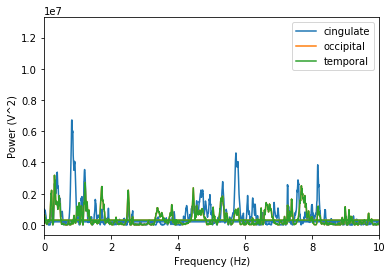

In [10]:
plt.figure(figsize=(6,4))
plot_pwsp(freqs_eyesopen, pwsp_eyesopen)
plt.legend(monkey_ecog_data['labels'])
plt.xlim([0,10])

# Power Spectrum of Monkey Eyes Closed

In [11]:
fft_eyesclosed = np.fft.fft(monkey_ecog_data['ecog_eyesclosed'].T)
pwsp_eyesclosed = np.abs(fft_eyesclosed)**2
freqs_eyesclosed = np.fft.fftfreq(len(monkey_ecog_data['ecog_eyesclosed'].T), 1/fs)

print(fft_eyesclosed.shape)
print(pwsp_eyesclosed.shape)
print(freqs_eyesclosed.shape)

(300000, 3)
(300000, 3)
(300000,)


(0, 1)

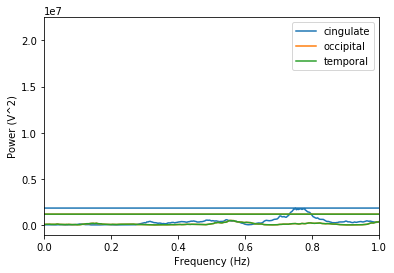

In [12]:
plt.figure(figsize=(6,4))
plot_pwsp(freqs_eyesclosed, pwsp_eyesclosed)
plt.legend(monkey_ecog_data['labels'])
plt.xlim([0,1])


# Power Spectrum of Monkey Anesthesized

In [13]:
fft_anes = np.fft.fft(monkey_ecog_data['ecog_anes'].T)
pwsp_anes = np.abs(fft_anes)**2
freqs_anes = np.fft.fftfreq(len(monkey_ecog_data['ecog_anes'].T), 1/fs)

print(fft_anes.shape)
print(pwsp_anes.shape)
print(freqs_anes.shape)

(300000, 3)
(300000, 3)
(300000,)


(0, 10)

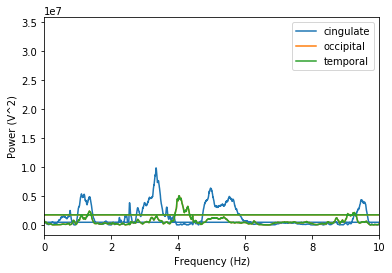

In [14]:
plt.figure(figsize=(6,4))
plot_pwsp(freqs_anes, pwsp_anes)
plt.legend(monkey_ecog_data['labels'])
plt.xlim([0,10])